## Step 1. Import the libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection,preprocessing,linear_model,naive_bayes,metrics,svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from io import StringIO
import seaborn as sns
import pandas.util.testing as tm

## Step 2. Import Data

In [7]:
Data = pd.read_csv(r"D:\Practice\ArtificialIntelligence\Natural Language Process\Industry Applications\Multi_Classify(consumer_complaint_classify)\consumer_complaints.csv",
                  encoding='latin-1')

C:\Users\Alex\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Step 3. Data understanding

In [8]:
Data.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [9]:
Data.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080
2,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,2013-08-30,Closed with explanation,Yes,Yes,510326
4,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,2013-08-30,Closed with explanation,Yes,Yes,511067


In [12]:
# Selecting required columns and rows
Data = Data[['product','consumer_complaint_narrative']]
Data = Data[pd.notnull(Data['consumer_complaint_narrative'])]
Data.head()

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...


In [74]:
#Factorizing the category column
Data['category_id'] = Data['product'].factorize()[0]
Data.head()


,product,consumer_complaint_narrative,category_id
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,I have an open and current mortgage with Chase...,2
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2


In [14]:
# Check the distribution of complaints by category
Data.groupby('product').consumer_complaint_narrative.count()

product
Bank account or service     5711
Consumer Loan               3678
Credit card                 7929
Credit reporting           12526
Debt collection            17552
Money transfers              666
Mortgage                   14919
Other financial service      110
Payday loan                  726
Prepaid card                 861
Student loan                2128
Name: consumer_complaint_narrative, dtype: int64

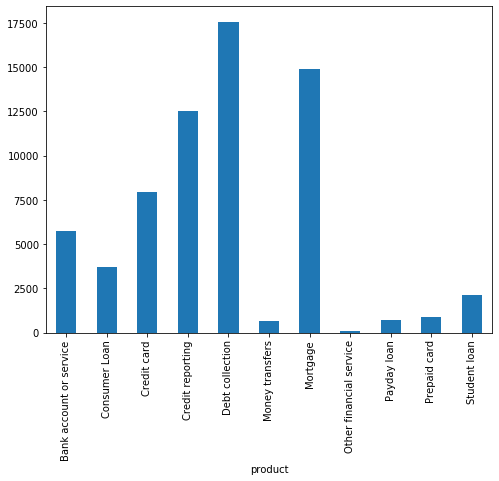

In [16]:
#Lets plot it and see
fig = plt.figure(figsize=(8,6))
Data.groupby('product').consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

## Step 4. Splitting the data

In [32]:
#Split the data into train and validation
train_x,valid_x,train_y,valid_y = model_selection.train_test_split(Data['consumer_complaint_narrative'],Data['product'])

## Step 5. Feature engineering using TF-IDF

In [37]:
# Consider maximum features to be 5000
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [41]:
tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}',max_features=5000)
tfidf_vect.fit(Data['consumer_complaint_narrative'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)

In [45]:
xtrain_tfidf

<50104x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 4546362 stored elements in Compressed Sparse Row format>

In [47]:
len(train_y)

50104

## Step 6. Model Building and Evaluation

In [ ]:
model = linear_model.LogisticRegression().fit(xtrain_tfidf,train_y)

In [49]:
#Checking accuracy
accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf),valid_y)
print("Accuracy: ",accuracy)

Accuracy:  0.8478026583642677


In [50]:
#Calssification report
print(metrics.classification_report(valid_y,model.predict(xvalid_tfidf),
                                   target_names=Data['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.82      0.80      0.81      1451
          Consumer Loan       0.81      0.59      0.68       963
               Mortgage       0.80      0.81      0.81      1990
            Credit card       0.85      0.86      0.86      3227
       Credit reporting       0.82      0.90      0.86      4298
           Student loan       0.86      0.47      0.61       163
Bank account or service       0.91      0.96      0.93      3660
            Payday loan       0.00      0.00      0.00        21
        Money transfers       0.65      0.18      0.28       177
Other financial service       0.79      0.65      0.72       205
           Prepaid card       0.94      0.78      0.85       547

               accuracy                           0.85     16702
              macro avg       0.75      0.64      0.67     16702
           weighted avg       0.85      0.85      0.84     16702



C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y,model.predict(xvalid_tfidf))

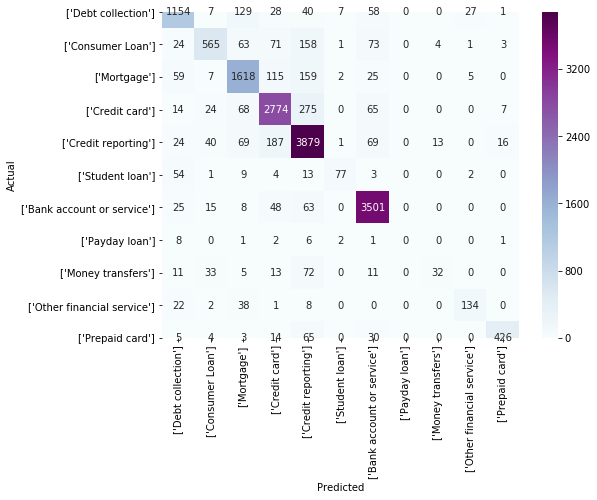

In [55]:
#visualizing the confusion matrix
category_id_df = Data[['product','category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id','product']].values)

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="BuPu",
    xticklabels=category_id_df[['product']].values,yticklabels=category_id_df[['product']].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [75]:
#Prediction example
texts = ["I have an open and current mortgage with Chase Bank # XXXX. Chase is reporting the loan payments to XXXX but XXXX is surpressing the information and reporting the loan as Discharged in BK. This mortgage was reaffirmed in a Chapter XXXX BK discharged dated XXXX/XXXX/2013. Chase keeps referring to BK Law for Chapter XXXX and we keep providing documentation for Chapter XXXX, and the account should be open and current with all the payments  "]
text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)

In [76]:
print(texts)
print(f"-predicted as '{id_to_category[predictions[0]]}'")

['I have an open and current mortgage with Chase Bank # XXXX. Chase is reporting the loan payments to XXXX but XXXX is surpressing the information and reporting the loan as Discharged in BK. This mortgage was reaffirmed in a Chapter XXXX BK discharged dated XXXX/XXXX/2013. Chase keeps referring to BK Law for Chapter XXXX and we keep providing documentation for Chapter XXXX, and the account should be open and current with all the payments  ']
-predicted as 'Bank account or service'
